## <p style="text-align: right;"> &#9989; Juuso Eronen, Victor Ramirez, Huaiyi Wu</p>

# Homework 2 - Face Recognition Overview

In this homework we are going to build a face recognition system using Principal Component Analysis (PCA) and Support Vector Machines(SVM) that can be used to model the problem of face recognition with success rates of around 80%.

Please read though the entire project before starting!

### Project Components and Grading,

1. (10 points) Use git to manage your project. 
    * Create a private repository in github or gitlab and include your instructor as a member.  
    * Have every person in the group make commitments. 
    * This is how you will turn in your final project. 
1. (30 points) Build a Face Recognition System 
    * Use the PCA/SVN code found in the 05-PCA in-class assingment
    * Change input dataset from digits to Faces in the wild dataset with min_faces_per_person=50, resize=0.4
    * Change number of eigenvectors to 150
    * Change the colormap from grays_r to grays to make the output look correct.
    * Have the code display 20 eigenvectors instead of just 4
1. (30 points) Generate your own face database with members of your team and/or class and include the images in a folder in your git repository. 
    * Minimum 3 pictures per group member (more is better).  You are encouraged to share pictures with other teams.
    * Process the pictures to match the FITW dataset.
    * Save the images as jpgs.  
    * Write a function to read in the images and display them.
1. (30 points) Run Face recognition on your generated database.
    * Create a function to convert the images into vector form that can be used by PCA and the SVM.
    * Reduce the size of your vectors to 150 using the PCA Transform.
    * Test the SVN classifier using your reduced vector class images.  
    * Display the final results with titles indicating their matched classes.  


As in the previous homework, you will be expected to split the work evenly between your teammates.  

----
# Part 1: (10 points) Use git to manage your projects
As in the previous homework, you will be expected to split the work evenly between your teammates.  
    * Create a private repository in github or gitlab and include your instructor as a member.  
    * Have every person in the group make commitments. 
    * This is how you will turn in your final project. 

**Question 1**: What is the command the instructors should use to download your project?

git clone

**Question 2**: Although everyone is responsible for the entire homework.  How did you split up the work for this project?

Parts 2, 3 and 4 formed a natural division between three people. Huaiyi took part 2, Victor part 3 and Juuso part 4.

----
# Part 2: (30 points)  Build a Face Recognition System
Make a copy of this Jupyter notebook and add it to your git repository. Build your own face recognition system using the code from 05-PCA in-class assignment using digits. If successful your face recognition should have an precision of over 80%. 

**Hint:** this should be fairly strait-forward you will need to consider changing the following:
    * Change input dataset from digits to Faces in the wild dataset with min_faces_per_person=50, resize=0.4
    * Change number of eigenvectors to 150
    * Change the colormap from grays_r to grays to make the output look correct.
    * Have the code display 20 ofthe 150 eigenvectors instead of just 4


In [171]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
from sklearn.datasets import fetch_lfw_people, load_digits

sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)


In [172]:
from ipywidgets import interact

def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))

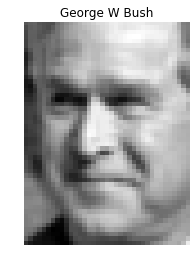

In [173]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

In [174]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

print("The number of samples is",n_samples)
print("The number of feature is",n_features)
print("The number of classes",n_classes)
print("The shapes of the image dimensions",N,h,w)


The number of samples is 1560
The number of feature is 1850
The number of classes 12
The shapes of the image dimensions 1560 50 37


1170
390


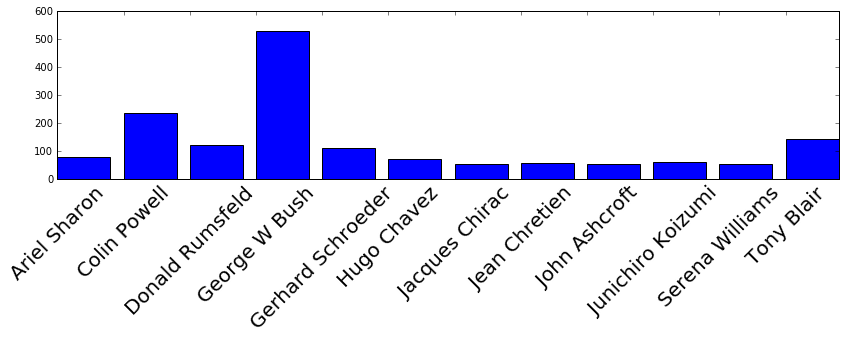

In [175]:
plt.figure(figsize=(14, 3))

y_unique = np.unique(class_labels)
counts = [(class_labels == i).sum() for i in y_unique]

plt.xticks(y_unique,  categories[y_unique])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=20)
_ = plt.bar(y_unique, counts)

from sklearn.cross_validation import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)
print(len(train_vectors))
print(len(test_vectors))

In [176]:
from sklearn.decomposition import RandomizedPCA

n_components = 150 # This is much less than the original n_features

print("Extracting the top %d eigenfaces from %d faces" % (
    n_components, train_vectors.shape[0]))

pca = RandomizedPCA(n_components=n_components, whiten=True)

%time pca.fit(train_vectors)

eigenfaces = pca.components_.reshape((n_components, h, w))
pca.components_.shape 

Extracting the top 150 eigenfaces from 1170 faces
CPU times: user 2.84 s, sys: 108 ms, total: 2.95 s
Wall time: 112 ms


(150, 1850)

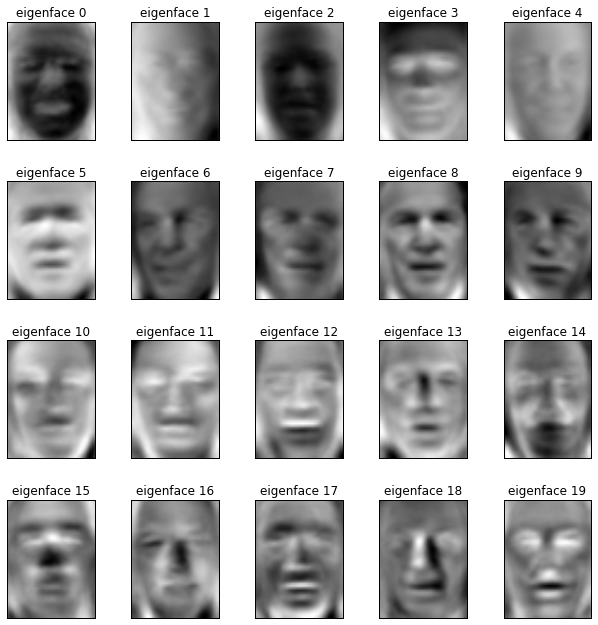

In [177]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits"""
    """Changed the gray scale"""
    
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=4, n_col=5)

In [178]:
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

train_pca = pca.transform(train_vectors)
test_pca = pca.transform(test_vectors)


print("Training set changed from a size of: ", train_vectors.shape, ' to: ', train_pca.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', test_pca.shape)



Training set changed from a size of:  (1170, 1850)  to:  (1170, 150)
Testing set changed from a size of:  (390, 1850)  to:  (390, 150)


In [179]:
###############################################################################
# Train a SVM classification model

#make some temporary variablse so you can change this easily
tmp_vectors = train_pca
tmp_labels = train_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
print(tmp_labels.shape)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
(1170,)
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [181]:
###############################################################################
# Quantitative evaluation of the model quality on the test set

#make some temporary variablse so you can change this easily
predict_vectors = test_pca
true_lables = test_labels

print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))


Predicting people's names on the test set
             precision    recall  f1-score   support

          0       0.79      0.69      0.73        16
          1       0.68      0.87      0.76        52
          2       0.78      0.69      0.74        36
          3       0.85      0.87      0.86       140
          4       0.75      0.72      0.74        29
          5       0.88      0.58      0.70        12
          6       0.57      0.50      0.53         8
          7       0.80      0.80      0.80        10
          8       0.79      0.79      0.79        14
          9       0.86      0.71      0.77        17
         10       0.79      0.73      0.76        15
         11       0.72      0.68      0.70        41

avg / total       0.79      0.78      0.78       390

[[ 11   2   0   0   0   0   0   1   1   0   1   0]
 [  3  45   0   3   0   0   0   0   0   0   1   0]
 [  0   1  25   8   0   0   0   1   0   0   0   1]
 [  0   8   3 122   0   0   2   0   1   0   1   3]
 [  0   1

**Question 3**: What is the final persition of the face recogition system?

<font size=8 color="#009600">&#9998;</font>Firstly like near 0.75, after trainnning, it getting close to 80% and larger.

--- 
# Part 3 (30 points) Generate your own face database.
Generate your own face database with members of your team and include the images in a folder in your git repository. Save the images as jpgs.  
* Minimum 3 pictures per group member (more is better).  You are encouraged to share pictures with other teams.
* Process the pictures to match the FITW dataset. Note you don't have to write a program to do this.  Try standard image processing tools on your computers. 
    * Center the faces in the pictures.
    * Convert the pictures to grayscale images.
    * Resize the pictures to be the same size as the FITW dataset. III : Application - Face Recognition Using Eigenfaces

**Question 4**: Create a function to read in your image files and display them either as a gallery or with a dynamic slider similar to the in-class assignment.

In [182]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
from sklearn.datasets import fetch_lfw_people


In [183]:
#import famous people faces

sk_data = fetch_lfw_people()
from ipywidgets import interact

def browse_images(images, labels, categories):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % categories[labels[i]])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))



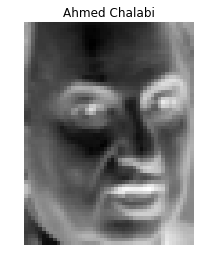

In [184]:
browse_images(sk_data.images, sk_data.target, sk_data.target_names)

In [185]:
feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names

n_samples, n_features = feature_vectors.shape
N, h, w = sk_data.images.shape
n_classes = len(categories)

print("Number of samples: {}; Number of features: {}; Number of classes: {}; Shape: {}; {} x {}".format
      (n_samples,n_features,n_classes, N,h,w))

Number of samples: 13233; Number of features: 2914; Number of classes: 5749; Shape: 13233; 62 x 47


In [186]:
def browse_database(images, labels):
    '''Edited browse_images function to use for our database; 
    images: list of images
    labels: a dictionary of names'''
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%s' % labels[i])
        plt.axis('off')
        plt.show()
    interact(view_image, i=(0,n-1))


In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import os

imges = []
path = "Img_database"
names = {}
count = 0
all_names = []

#make sure you're in right directory
if path not in os.getcwd():
    os.chdir(path)

name_opts = ["juuso", "victor", "huaiyi"]

for filename in os.listdir(os.getcwd()):
    if filename[-4:] == ".jpg":
        im = Image.open(filename)
        imges.append(im)
        # A little awkward, but this avoids us having to agree to
        # a parsing friendly naming scheme.
        for n in name_opts:
            if n in filename:
                all_names.append(n) # Label
                names[count] = n
        count += 1


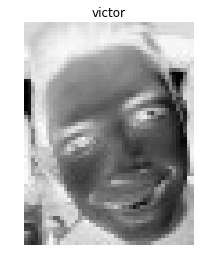

In [188]:
browse_database(imges, names)

----
# Part 4 (30 points) Run Face recognitoin on your generated database. 
In this part you will test the SVM classifier using your own face database.

**Question 5**: Create a function to convert the class images into vector form that can be used by PCA and the SVM.

In [189]:
def convert_imgs(imgs):
    list_of_flattened_imgs = [np.asarray(img).flatten() for img in imgs]
    feature_vectors = np.zeros(shape=(len(list_of_flattened_imgs), 62 * 47))
    for i, flat in enumerate(list_of_flattened_imgs):
        feature_vectors[i] = flat
    return feature_vectors

**Question 5**: Reduce the size of your vectors to 150 using the PCA Transform.

In [190]:
feature_vectors = convert_imgs(imges)
class_labels = all_names
from sklearn.cross_validation import train_test_split
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)

from sklearn.decomposition import RandomizedPCA

n_components = 150 

print("Extracting the top %d eigenfaces from %d faces" % (
    n_components, train_vectors.shape[0]))

pca = RandomizedPCA(n_components=n_components, whiten=True)

%time pca.fit(train_vectors)

from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

train_pca = pca.transform(train_vectors)
test_pca = pca.transform(test_vectors)


print("Training set changed from a size of: ", train_vectors.shape, ' to: ', train_pca.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', test_pca.shape)

Extracting the top 150 eigenfaces from 90 faces
CPU times: user 1.13 s, sys: 57.9 ms, total: 1.18 s
Wall time: 36.2 ms
Training set changed from a size of:  (90, 2914)  to:  (90, 90)
Testing set changed from a size of:  (30, 2914)  to:  (30, 90)


**Question 6**: Test your reduced feature vectors using the SVN classifier. 

In [191]:
tmp_vectors = train_pca
tmp_labels = np.asarray(train_labels)

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

predict_vectors = test_pca
true_lables = test_labels

print("Predicting people's names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(n_classes)))

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
             precision    recall  f1-score   support

      juuso       1.00      1.00      1.00        20
     victor       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


**Question 7**: Display your images again with titles indicating their matched classes.

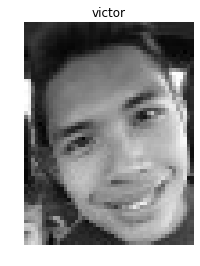

In [192]:
import scipy.misc

idx_to_label = {}
for i, label in enumerate(pred_labels):
    idx_to_label[i] = label
images = [Image.fromarray(arr.reshape((62, 47))) for arr in test_vectors]
browse_database(images, idx_to_label)

----
# Part 5 Extra work for extra motivated people 
If you are interested, see if you can develop a training set from your class images.  Can you train and test your own face recognition system? 

### Turning in your homework

Now, you need to submit this assignment by uploading this jupyter notebook file to the course Desire2Learn web page. Instructors will use this file to motivate downloading of your git repository and grading of your homeowrk. This means we will have two identical copies of this notebook (one in D2L and one in your git repositroy.  Each group must only submit one file to D2L.   

Don't forget to add your names in the first cell.  Turn in all files using the "Homework assignments" folder, find the dropbox link for "HW2-Face_recognition", and upload it there.